Edie Miglio

email: edie.miglio@polimi.it

Subject for the emails: NAML2023

# Introduction to Python

## Project 13: Solution of ODE or system of ODEs

**Skills.**

* <code>odeint</code> function
* style of the plot

### SIR model

**Problem.** A simple mathematical description of the spread of a disease in a population is the so-called SIR model, which divides the (fixed) population of $N$ individuals into three "compartments" which may vary as a function of time, $t$:

* $S(t)$ are those susceptible but not yet infected with the disease;
* $I(t)$ is the number of infectious individuals;
* $R(t)$ are those individuals who have recovered from the disease and now have immunity to it.

The SIR model describes the change in the population of each of these compartments in terms of two parameters $\beta$ and $\gamma$. $\beta$ describes the effective contact rate of the disease: an infected individual comes into contact with $\beta N$ other individuals per unit time (of which the fraction that are susceptible to contracting the disease is $S/N$). $\gamma$ is the mean recovery rate: that is, $1/\gamma$ is the mean period of time during which an infected individual can pass it on.

The differential equations describing this model are

$$
\frac{dS}{dt}=-\frac{\beta S I}{N}, \\
\frac{dI}{dt}=\frac{\beta S I}{N}-\gamma I, \\
\frac{dR}{dt}=\gamma I.
$$

Simulate the dynamics for $\beta=0.2, 1/\gamma=10 \textrm{days}$ in a population of $N=1000$. The model is started with a single infected individual on day $0$ *i.e.* $I(0)=1$.

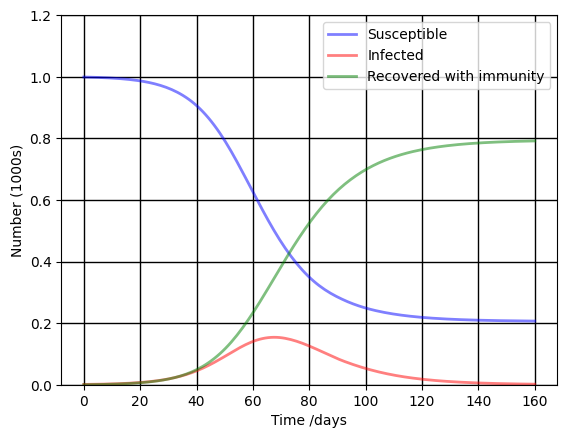

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def SIR(t, y, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = [S0, I0, R0]

# Timespan
ts = [0,160]

# Evaluation times
tt = np.linspace(0,160,160)

# Integrate the SIR equations over the time span [0,160].
sol = solve_ivp(SIR, ts, y0, t_eval=tt, args=(N, beta, gamma))

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[0]/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(sol.t, sol.y[1]/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(sol.t, sol.y[2]/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.grid(c='k', lw=1, ls='-')

legend = ax.legend()
plt.show()

### Lotka Volterra model

**Problem.** The model describes the variation in populations of two species which interact via predation. The equations are as follows
$$
\dot{x}=\frac{dx}{dt}=x(\alpha-\beta y) \\
\dot{y}=\frac{dy}{dt}=y(-\delta+\gamma x),
$$
where $\alpha, \beta, \gamma$ and $\delta$ are positive constants.
Suppose to consider the initial conditions $x(0)=4, y(0)=2$.
To start consider the case $\alpha=\beta=\gamma=\delta=1$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
alpha = 1.5
beta = 1.
delta = 3.
gamma = 1.

def LV(t, X, alpha, beta, delta, gamma):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-delta + gamma * x)
    return dotx, doty

# Initial conditions vector
X0 = [10,5]

# Timespan
ts = [0,30]

# Evaluation times
tt = np.linspace(0,30,1000)

sol = solve_ivp(LV, ts, X0, t_eval=tt, args = (alpha, beta, delta, gamma))

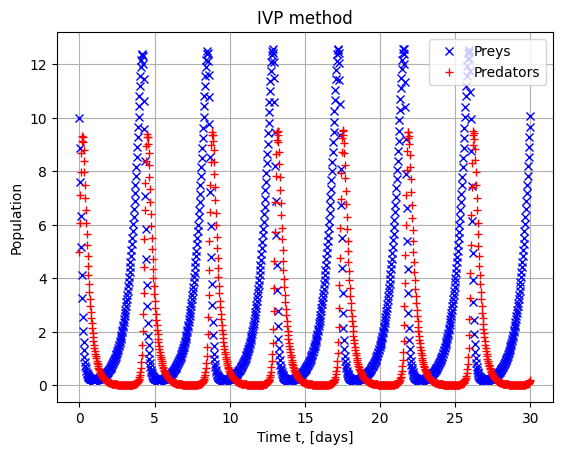

In [ ]:
plt.figure()
plt.grid()
plt.title("IVP method")
plt.plot(sol.t, sol.y[0], 'xb', label = 'Preys')
plt.plot(sol.t, sol.y[1], '+r', label = "Predators")
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show()

Let us now plot on the phase space.

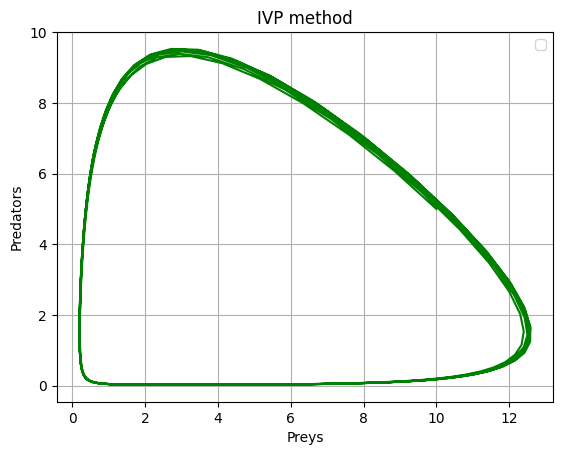

In [ ]:
plt.figure()
plt.grid()
plt.title("IVP method")
plt.plot(sol.y[0], sol.y[1], 'g')
plt.xlabel('Preys')
plt.ylabel('Predators')

plt.show()

**Exercise.** A cosmetics manufacturer has a marketing policy based upon the price
$x(t)$ of its salon shampoo.
The production $P(t)$ and the sales $S(t)$ are given in terms of the price
$x(t)$ and the change in price $\dot{x}(t)$ by the equations

$$
P(t) = 4- \frac{3}{4}x(t) − 8\dot{x}(t) \qquad \textrm{(Production)}, \\
S(t) = 15 − 4x(t) − 2\dot{x}(t) \qquad \textrm{(Sales)}.
$$

The differential equations for the price $x(t)$ and inventory level $I(t)$ are
$$
\dot{x}(t) = k(I(t) − I_0), \\
\dot{I}(t) = P(t) − S(t).
$$

The inventory level $I_0 = 50$ represents the desired level. The equations
can be written in terms of $x(t)$ and $I(t)$ as follows:
$$
\dot{x}(t) = kI(t) − kI_0, \\
\dot{I}(t) = \frac{13}{4}x(t) − 6kI(t) + 6 k I_0 − 11.
$$

Solve the system for $k = 1, x(0) = 10$ and $I(0) = 7$.

## Project 14: Julia sets

**Skills.**

* complex numbers
* iterations

**Problem.** The Julia set belongs to the complex plane.

The equation to generate Julia fractal is:
$$
f_{c}(z)=z^{2}+c
$$

where $c$ is a complex parameter. The Julia set for this system is the subset of the complex plane given by:

$$
J(f_{c})=\left \{ z\in  \mathbb{ C}:\forall n\in\mathbb{N},|f_{c}^{n}(z)|\leq 2  \right \}
$$



In [ ]:
import numpy as np
help(np.ogrid)

Help on OGridClass in module numpy.lib.index_tricks object:

class OGridClass(nd_grid)
 |  `nd_grid` instance which returns an open multi-dimensional "meshgrid".
 |  
 |  An instance of `numpy.lib.index_tricks.nd_grid` which returns an open
 |  (i.e. not fleshed out) mesh-grid when indexed, so that only one dimension
 |  of each returned array is greater than 1.  The dimension and number of the
 |  output arrays are equal to the number of indexing dimensions.  If the step
 |  length is not a complex number, then the stop is not inclusive.
 |  
 |  However, if the step length is a **complex number** (e.g. 5j), then
 |  the integer part of its magnitude is interpreted as specifying the
 |  number of points to create between the start and stop values, where
 |  the stop value **is inclusive**.
 |  
 |  Returns
 |  -------
 |  mesh-grid
 |      `ndarrays` with only one dimension not equal to 1
 |  
 |  See Also
 |  --------
 |  np.lib.index_tricks.nd_grid : class of `ogrid` and `mgrid` obj

In [ ]:
np.ogrid[0:8:4j,0:5]

[array([[0.        ],
        [2.66666667],
        [5.33333333],
        [8.        ]]), array([[0., 1., 2., 3., 4.]])]

In [ ]:
def julia_set(h_range, w_range, max_iterations):
  ''' A function to determine the values of the Julia set. Takes
  an array size specified by h_range and w_range, in pixels, along
	with the number of maximum iterations to try.  Returns an array with
	the number of iteration at each array value.
	'''
  y, x = np.ogrid[1.4: -1.4: h_range*1j, -1.4: 1.4: w_range*1j]
  z_array = x + y*1j
  c = -0.744 + 0.148j
  julia = np.zeros(z_array.shape)
  for h in range(h_range):
    for w in range(w_range):
      z = z_array[h][w]
      for i in range(max_iterations):
        z = z**2 + c
        if z * np.conj(z) > 2:
          julia[h][w]=i
          break

  return julia

In [ ]:
julia_set(10, 10, 100)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  3.,  2.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  3., 72., 21.,  0.,  3.,  1.,  1.,  0.],
       [ 5.,  0., 21.,  0., 42., 18.,  0.,  0.,  4.,  1.],
       [ 1.,  4.,  0.,  0., 18., 42.,  0., 21.,  0.,  5.],
       [ 0.,  1.,  1.,  3.,  0., 21., 72.,  3.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  2.,  3.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

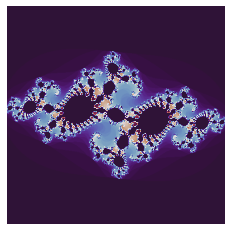

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(julia_set(500, 500, 70), cmap='twilight_shifted')
plt.axis('off')
plt.show()
plt.close()